# **TẢI CÁC THƯ VIỆN CẦN THIẾT**

In [236]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# **ĐỌC DỮ LIỆU**

In [237]:
dataset = pd.read_csv('/content/drive/MyDrive/dataset/dataset.csv')
print(dataset.head(10))

   ID                   Name  Age  Gender Department  YearsExperience  \
0   1           Cory Escobar   48  Female      Sales              1.1   
1   2        Timothy Sanchez   25   Other      Sales              1.3   
2   3           Chad Nichols   57   Other      Sales              1.5   
3   4  CSalesistine Williams   58  Female      Sales              1.5   
4   5           Amber Harris   35   Other      Sales              2.0   
5   6            Ashley Howe   29  Female      Sales              2.2   
6   7            David Olson   39  Female      Sales              2.9   
7   8           Amanda Baker   52   Other      Sales              3.0   
8   9          Jeremy Wright   63  Female      Sales              3.2   
9  10         Brian Faulkner   30    Male      Sales              3.2   

    Salary  Performance Score Experience    Status     Location  Session  
0  39343.0                2.0         16    Active     New York    Night  
1  46205.0                2.0         11  Inac

# **THÔNG TIN VỀ DỮ LIỆU**

In [238]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 169 non-null    int64  
 1   Name               169 non-null    object 
 2   Age                169 non-null    int64  
 3   Gender             169 non-null    object 
 4   Department         169 non-null    object 
 5   YearsExperience    165 non-null    float64
 6   Salary             165 non-null    float64
 7   Performance Score  81 non-null     float64
 8   Experience         169 non-null    object 
 9   Status             169 non-null    object 
 10  Location           169 non-null    object 
 11  Session            168 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 16.0+ KB


In [239]:
X = dataset['YearsExperience'].values
Y = dataset['Salary'].values

X

array([ 1.1 ,  1.3 ,  1.5 ,  1.5 ,  2.  ,  2.2 ,  2.9 ,  3.  ,  3.2 ,
        3.2 ,  3.7 ,  3.9 ,  4.  ,  4.1 ,  4.5 ,  4.9 ,  5.1 ,  5.3 ,
        5.9 ,  5.9 ,  6.  ,  6.8 ,  6.8 ,  6.7 ,  7.1 ,  8.7 ,  9.  ,
        9.5 ,  9.5 , 10.3 , 10.5 ,  1.1 ,  1.3 ,  1.3 ,  1.6 ,  1.6 ,
        9.5 ,  1.6 ,  9.5 ,  1.6 ,  9.5 ,  9.5 ,  9.5 ,  9.5 ,  1.1 ,
        1.2 ,  3.2 ,  3.2 ,   nan,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
        9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,
        7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  4.7 ,
        4.7 ,   nan,   nan,  4.7 ,  4.7 ,  4.7 ,  4.7 ,  4.7 ,  1.2 ,
        1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  2.1 ,
        2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,
        3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.4 ,  4.3 ,
        5.2 ,  5.2 ,  5.2 ,  5.2 ,  9.25,  9.25,  9.25,  9.25,  2.8 ,
        2.8 ,  2.7 ,  2.75,  2.6 ,  2.9 ,  2.6 ,  2.45,  6.2 ,  7.6 ,
        8.6 ,  8.6 ,

In [240]:
Y

array([ 39343.,  46205.,  37731.,  37731.,  43525.,  39891.,  56642.,
        60150.,  54445.,  64445.,  57189.,     nan,  55794.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  81363.,  93940.,
        91738.,  91738.,  91728.,  98273., 109431., 105582., 116969.,
       116969.,     nan, 121872.,  39343.,  46205.,  46205.,  46225.,
        46225., 121872.,  46225., 121872.,  46225., 121872., 121872.,
       121872., 121872.,  39343.,  39343.,  54435.,  54445.,  54445.,
       105382., 105382., 105382., 105382., 105382., 105382., 105382.,
       105382., 105382., 105382.,  98173.,  98173.,  98173.,  98173.,
        98173.,  98173.,  98173.,  98173.,  98173.,  98173.,  98173.,
        98173.,  67933.,  67933.,  67933.,  67933.,  67933.,  67933.,
        67933.,  67933.,  67933.,  39343.,  39343.,  39343.,  39343.,
        39343.,  39343.,  39343.,  39343.,  39343.,  43524.,  43524.,
        43524.,  43524.,  43524.,  43524.,  43524.,  43524.,  43524.,
        43524.,  601

# **TRỰC QUAN HÓA DỮ LIỆU BẰNG BIỂU ĐỒ**




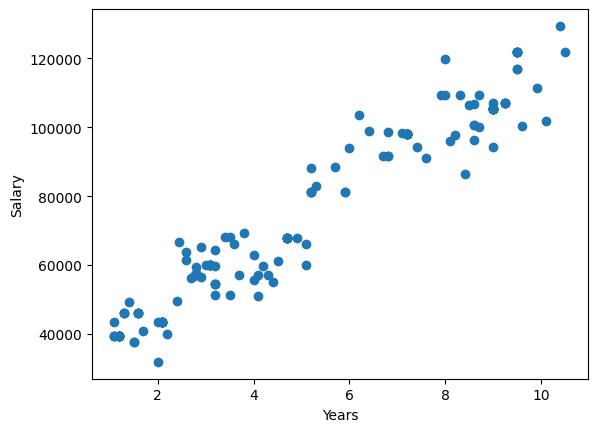

In [241]:
#Y = ax + b
plt.scatter(X, Y)
plt.xlabel("Years")
plt.ylabel("Salary")
plt.show()

# **XỬ LÝ DỮ LIỆU**

In [242]:
dataset.duplicated().sum() # Trùng lặp

0

In [243]:
dataset.isnull().sum() # Thiếu

,0
ID,0
Name,0
Age,0
Gender,0
Department,0
YearsExperience,4
Salary,4
Performance Score,88
Experience,0
Status,0


In [244]:
from sklearn.impute import SimpleImputer

# Xử lý giá trị thiếu

imputer = SimpleImputer(strategy='mean')
dataset['YearsExperience'] = imputer.fit_transform(dataset[['YearsExperience']])
dataset['Salary'] = imputer.fit_transform(dataset[['Salary']])

In [245]:
X

array([ 1.1 ,  1.3 ,  1.5 ,  1.5 ,  2.  ,  2.2 ,  2.9 ,  3.  ,  3.2 ,
        3.2 ,  3.7 ,  3.9 ,  4.  ,  4.1 ,  4.5 ,  4.9 ,  5.1 ,  5.3 ,
        5.9 ,  5.9 ,  6.  ,  6.8 ,  6.8 ,  6.7 ,  7.1 ,  8.7 ,  9.  ,
        9.5 ,  9.5 , 10.3 , 10.5 ,  1.1 ,  1.3 ,  1.3 ,  1.6 ,  1.6 ,
        9.5 ,  1.6 ,  9.5 ,  1.6 ,  9.5 ,  9.5 ,  9.5 ,  9.5 ,  1.1 ,
        1.2 ,  3.2 ,  3.2 ,   nan,  9.  ,  9.  ,  9.  ,  9.  ,  9.  ,
        9.  ,  9.  ,  9.  ,  9.  ,  9.  ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,
        7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  7.2 ,  4.7 ,
        4.7 ,   nan,   nan,  4.7 ,  4.7 ,  4.7 ,  4.7 ,  4.7 ,  1.2 ,
        1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  1.2 ,  2.1 ,
        2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,  2.1 ,
        3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.1 ,  3.4 ,  4.3 ,
        5.2 ,  5.2 ,  5.2 ,  5.2 ,  9.25,  9.25,  9.25,  9.25,  2.8 ,
        2.8 ,  2.7 ,  2.75,  2.6 ,  2.9 ,  2.6 ,  2.45,  6.2 ,  7.6 ,
        8.6 ,  8.6 ,

In [246]:
Y

array([ 39343.,  46205.,  37731.,  37731.,  43525.,  39891.,  56642.,
        60150.,  54445.,  64445.,  57189.,     nan,  55794.,  57081.,
        61111.,  67938.,  66029.,  83088.,  81363.,  81363.,  93940.,
        91738.,  91738.,  91728.,  98273., 109431., 105582., 116969.,
       116969.,     nan, 121872.,  39343.,  46205.,  46205.,  46225.,
        46225., 121872.,  46225., 121872.,  46225., 121872., 121872.,
       121872., 121872.,  39343.,  39343.,  54435.,  54445.,  54445.,
       105382., 105382., 105382., 105382., 105382., 105382., 105382.,
       105382., 105382., 105382.,  98173.,  98173.,  98173.,  98173.,
        98173.,  98173.,  98173.,  98173.,  98173.,  98173.,  98173.,
        98173.,  67933.,  67933.,  67933.,  67933.,  67933.,  67933.,
        67933.,  67933.,  67933.,  39343.,  39343.,  39343.,  39343.,
        39343.,  39343.,  39343.,  39343.,  39343.,  43524.,  43524.,
        43524.,  43524.,  43524.,  43524.,  43524.,  43524.,  43524.,
        43524.,  601

In [247]:
X = dataset['YearsExperience'].values
Y = dataset['Salary'].values

from sklearn.preprocessing import MinMaxScaler

# Chuẩn hóa dữ liệu ( Sử dụng MinMaxScaler )
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X.reshape(-1, 1))
Y_scaled = scaler.fit_transform(Y.reshape(-1, 1))

# Chia tập dữ liệu thành tập huấn luyện và tập kiểm tra
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, Y_train, Y_test = train_test_split (X_scaled, Y_scaled, test_size = 0.2)

In [248]:
X_test

array([[0.78723404],
       [1.        ],
       [0.17553191],
       [0.9787234 ],
       [0.09574468],
       [0.73404255],
       [0.43854932],
       [0.84042553],
       [0.21276596],
       [0.64893617],
       [0.40425532],
       [0.4893617 ],
       [0.79787234],
       [0.0106383 ],
       [0.64893617],
       [0.0106383 ],
       [0.63829787],
       [0.43617021],
       [0.38297872],
       [0.43617021],
       [0.5106383 ],
       [0.42553191],
       [0.        ],
       [0.5106383 ],
       [0.30851064],
       [0.22340426],
       [0.0106383 ],
       [0.10638298],
       [0.38297872],
       [0.84042553],
       [0.89361702],
       [0.84042553],
       [0.35106383],
       [0.43617021]])

In [249]:
X_train

array([[0.64893617],
       [0.77659574],
       [0.04255319],
       [0.10638298],
       [0.75531915],
       [0.32978723],
       [0.10638298],
       [0.86702128],
       [0.84042553],
       [0.26595745],
       [0.76595745],
       [0.10638298],
       [0.64893617],
       [0.89361702],
       [0.79787234],
       [0.60638298],
       [0.21276596],
       [0.67021277],
       [0.10638298],
       [0.29787234],
       [0.64893617],
       [0.84042553],
       [0.19148936],
       [0.89361702],
       [0.38297872],
       [0.22340426],
       [0.89361702],
       [0.89361702],
       [0.09574468],
       [0.13829787],
       [0.0212766 ],
       [0.64893617],
       [0.79787234],
       [0.10638298],
       [0.27659574],
       [0.21276596],
       [0.86702128],
       [0.        ],
       [0.69148936],
       [0.18085106],
       [0.64893617],
       [0.        ],
       [0.15957447],
       [0.89361702],
       [0.89361702],
       [0.17021277],
       [0.80851064],
       [0.595

In [250]:
Y_test

array([[0.76417822],
       [0.92246576],
       [0.25698146],
       [0.44751205],
       [0.        ],
       [0.90134708],
       [0.80441647],
       [0.75341384],
       [0.28975642],
       [0.67950873],
       [0.36954605],
       [0.57893874],
       [0.70482039],
       [0.07639629],
       [0.67950873],
       [0.07639629],
       [0.68053391],
       [0.50435701],
       [0.36949479],
       [0.50435701],
       [0.50717625],
       [0.3499754 ],
       [0.07639629],
       [0.50717625],
       [0.24504839],
       [0.33373657],
       [0.07639629],
       [0.119259  ],
       [0.36949479],
       [0.75341384],
       [0.92246576],
       [0.75341384],
       [0.23804642],
       [0.50435701]])

In [251]:
Y_train

array([[0.67950873],
       [0.55825064],
       [0.05987042],
       [0.119259  ],
       [0.67399327],
       [0.28605552],
       [0.119259  ],
       [0.77084188],
       [0.7554642 ],
       [0.35126712],
       [0.44751205],
       [0.119259  ],
       [0.67950873],
       [0.92246576],
       [0.70496391],
       [0.61353851],
       [0.28975642],
       [0.6385016 ],
       [0.119259  ],
       [0.44751205],
       [0.67950873],
       [0.64037768],
       [0.2537419 ],
       [0.87220126],
       [0.36949479],
       [0.20046338],
       [0.92246576],
       [0.92246576],
       [0.11926925],
       [0.1807697 ],
       [0.14674403],
       [0.67950873],
       [0.66077873],
       [0.119259  ],
       [0.25934963],
       [0.28975642],
       [0.77084188],
       [0.07639629],
       [0.60839211],
       [0.2833593 ],
       [0.67950873],
       [0.07639629],
       [0.30312474],
       [0.87220126],
       [0.92246576],
       [0.24873903],
       [0.79492332],
       [0.613

# **HUẤN LUYỆN DỮ LIỆU**

In [252]:
from sklearn.linear_model import LinearRegression

# Huấn luyện mô hình hồi quy tuyến tính
model = LinearRegression()
model.fit(X_train, Y_train)

# Dự đoán trên tập kiểm tra
y_pred = model.predict(X_test)

# Hiển thị kết quả
du_doan = pd.DataFrame({'Y_actual': Y_test.flatten(), 'Y_pred': y_pred.flatten()})
print(du_doan)


    Y_actual    Y_pred
0   0.764178  0.738536
1   0.922466  0.916070
2   0.256981  0.228125
3   0.447512  0.898317
4   0.000000  0.161550
5   0.901347  0.694152
6   0.804416  0.447590
7   0.753414  0.782919
8   0.289756  0.259194
9   0.679509  0.623139
10  0.369546  0.418974
11  0.578939  0.489988
12  0.704820  0.747413
13  0.076396  0.090536
14  0.679509  0.623139
15  0.076396  0.090536
16  0.680534  0.614262
17  0.504357  0.445605
18  0.369495  0.401221
19  0.504357  0.445605
20  0.507176  0.507742
21  0.349975  0.436728
22  0.076396  0.081660
23  0.507176  0.507742
24  0.245048  0.339084
25  0.333737  0.268071
26  0.076396  0.090536
27  0.119259  0.170427
28  0.369495  0.401221
29  0.753414  0.782919
30  0.922466  0.827303
31  0.753414  0.782919
32  0.238046  0.374591
33  0.504357  0.445605


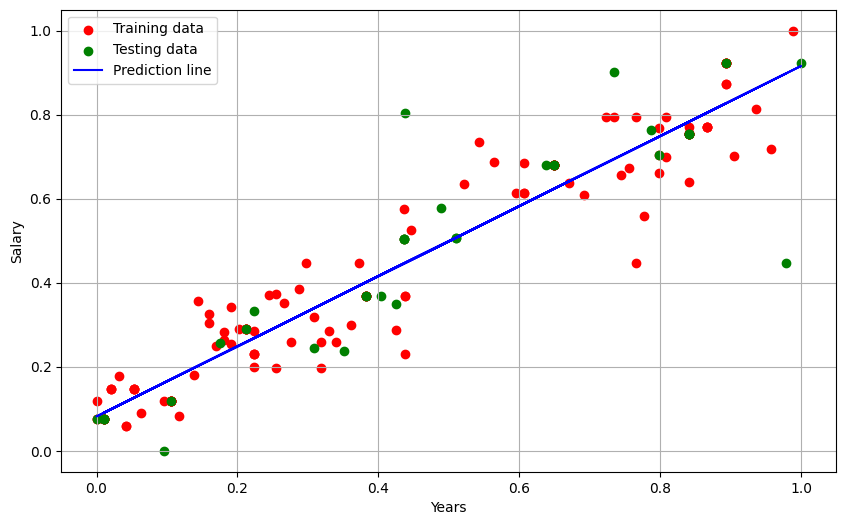

In [253]:
# Vẽ đồ thị
plt.figure(figsize=(10, 6))
plt.scatter(X_train, Y_train, color='red', label='Training data')
plt.scatter(X_test, Y_test, color='green', label='Testing data')
plt.plot(X_test, y_pred, color='blue', label='Prediction line')
plt.xlabel('Years')
plt.ylabel('Salary')
plt.legend()
plt.grid(True)
plt.show()

$\hat{y} = \mathbf{w}^{T}x + w_{0}, \mathbf{w} \in \mathbb{R}^{N\times 1}; x \in \mathbb{R}^{N\times 1}, w_{0}:bias;$



$\hat{y} = ax + b$